In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import statistics as st
import collections
sns.set(rc={'figure.figsize':(8,6)})


In [3]:
matches = pd.read_csv('matches.csv')
delivries = pd.read_csv('deliveries.csv')

In [4]:
dc  = 'Delhi Capitals'

dd = 'Delhi Daredevils'
srh = 'Sunrisers Hyderabad'

In [5]:
matches.replace({"Delhi Daredevils":"Delhi Capitals"},inplace=True)
delivries.replace({"Delhi Daredevils":"Delhi Capitals"},inplace=True)

In [6]:
out = []
for i in range(0,len(delivries)):
    if(delivries['batsman'].iloc[i]==delivries['player_dismissed'].iloc[i]):
        out.append(1)
    else:
        out.append(0)
delivries['is_out'] = out

is_four = []
for i in range(0,len(delivries)):
    if(delivries['batsman_runs'].iloc[i]==4):
        is_four.append(1)
    else:
        is_four.append(0)
delivries['is_four'] = is_four

is_six = []
for i in range(0,len(delivries)):
    if(delivries['batsman_runs'].iloc[i]==6):
        is_six.append(1)
    else:
        is_six.append(0)
delivries['is_six'] = is_six

In [7]:
delivries['balls_faced'] = 1

### Who will win?

<AxesSubplot:>

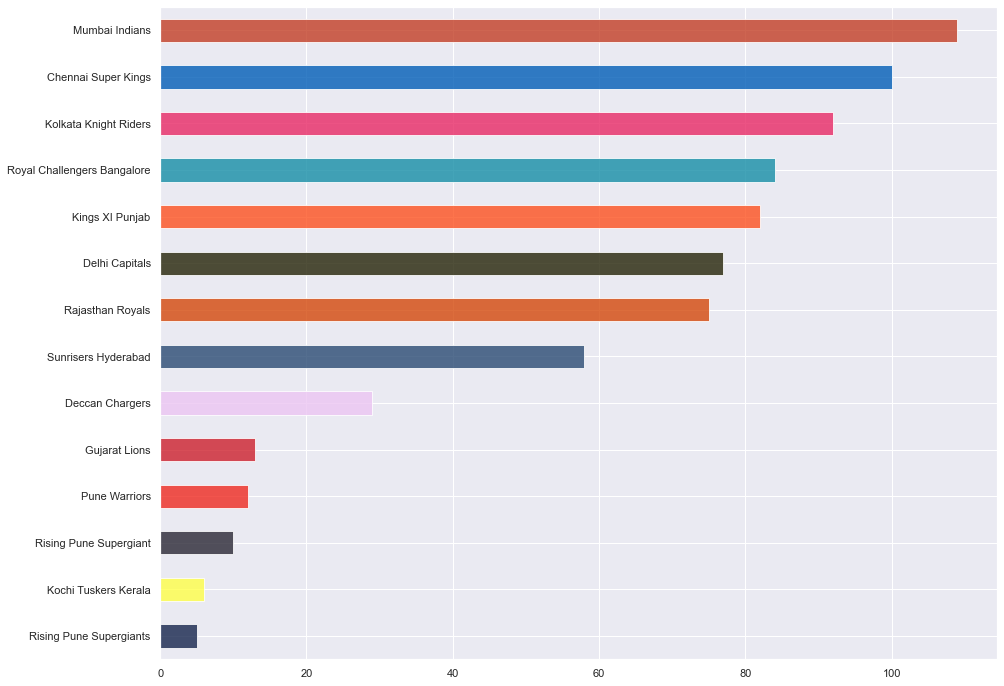

In [8]:
# Lets see who won most and how many matches yet!
sns.set(rc={'figure.figsize':(15,12)})
color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82865']
matches['winner'].value_counts().sort_values().plot(kind = 'barh',color=color,alpha=0.8)

In [9]:
matches_dcvssrh = matches.loc[((matches['team1'] ==dc) & (matches['team2'] == srh) | (matches['team1'] == srh) & (matches['team2'] ==dc))]
deliveries_dcvssrh = delivries.loc[((delivries['batting_team'] == dc) & (delivries['bowling_team'] == srh)) | ((delivries['batting_team'] ==srh) & (delivries['bowling_team'] == dc))]


## How many balls DC required to score 20 after 30??

In [27]:
runs_dc = deliveries_dcvssrh[deliveries_dcvssrh['batting_team']==dc].groupby(['match_id','inning','over','ball'],as_index=False)
runs_dc = pd.DataFrame(runs_dc.sum())

runs_srh = deliveries_dcvssrh[deliveries_dcvssrh['batting_team']==srh].groupby(['match_id','inning','over','ball'],as_index=False)
runs_srh = pd.DataFrame(runs_srh.sum())

In [19]:
def run_to_ball_counter(run,ball_list,data):
    for ids in data['match_id'].unique():
        ball=0
        runs = 0
        for i in range(len(data)):
            if(data['match_id'].iloc[i]==ids):
                if(runs>=run):
                    ball_list.append(ball)
                    break
                else:
                    ball+=1
                    runs+=runs_dc['total_runs'].iloc[i]

            else:
                continue

                

In [22]:
fifty_runs_ball = []
thirty_runs_ball = []
run_to_ball_counter(50,fifty_runs_ball,runs_dc)
run_to_ball_counter(30,thirty_runs_ball,runs_dc)

In [26]:
twenty_dc = list(np.array(fifty_runs_ball) - np.array(thirty_runs_ball))
twenty_dc

[11, 9, 26, 22, 16, 9, 15, 11, 15, 18, 11, 23, 18, 13, 5]

In [28]:
fifty_runs_ball = []
thirty_runs_ball = []
run_to_ball_counter(50,fifty_runs_ball,runs_srh)
run_to_ball_counter(30,thirty_runs_ball,runs_srh)

In [29]:
twenty_srh = list(np.array(fifty_runs_ball) - np.array(thirty_runs_ball))
twenty_srh

[11, 9, 27, 22, 16, 11, 12, 15, 10, 15, 15, 10, 13, 22, 19]

In [31]:
dc_twenty_srh = list(np.array(twenty_dc)- np.array(twenty_srh))
dc_twenty_srh

[0, 0, -1, 0, 0, -2, 3, -4, 5, 3, -4, 13, 5, -9, -14]

<AxesSubplot:ylabel='count'>

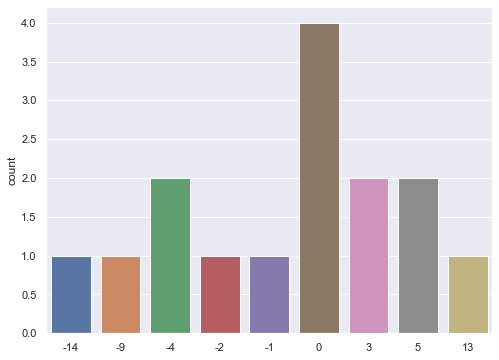

In [34]:
sns.countplot(dc_twenty_srh)

In [35]:
st.mean(dc_twenty_srh)

0

In [36]:
st.median(dc_twenty_srh)

0

##  DA Warner

In [55]:
warner = deliveries_dcvssrh[deliveries_dcvssrh['batsman']=="DA Warner"].groupby(['match_id','inning','over','ball'],as_index=False)
warner = pd.DataFrame(warner.sum())
warner = warner.drop(index=[28,29,30,31])
warner

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,is_out,is_four,is_six,balls_faced
0,21,1,1,1,0,0,0,0,1,0,1,1,2,0,0,0,1
1,21,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,1
2,21,1,1,5,0,0,0,0,0,0,1,0,1,0,0,0,1
3,21,1,1,7,0,0,0,0,0,0,1,0,1,0,0,0,1
4,21,1,2,1,0,0,0,0,0,0,1,0,1,0,0,0,1
5,21,1,2,4,0,0,0,0,0,0,0,0,0,0,0,0,1
6,21,1,2,5,0,0,0,0,0,0,0,0,0,1,0,0,1
7,39,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
8,39,1,1,2,0,0,0,0,0,0,4,0,4,0,1,0,1
9,39,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1


In [58]:
sum_of_run = dict()
for match_id, sub_df in warner[['match_id', 'batsman_run']].groupby('match_id'):
    sum_of_run[match_id] = sub_df.iloc[-7:]['batsman_run'].sum()

KeyError: "['batsman_run'] not in index"

## Which batsman score most boundaries


In [47]:
bound = deliveries_dcvssrh.groupby(['batsman'],as_index=False)
bound = pd.DataFrame(bound.sum())
bound['total_boundaries'] = bound['is_four'] + bound['is_six']
bound.sort_values(by=['total_boundaries'],inplace=True,ascending=False)


In [49]:
## Top 5 most boundires players
bound.head()

,batsman,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,is_out,is_four,is_six,balls_faced,total_boundaries
67,S Dhawan,1157519,449,1977,1087,0,3,4,11,1,0,398,19,417,12,47,8,308,55
64,RR Pant,1245112,304,2531,723,0,5,0,3,0,0,333,8,341,6,30,16,207,46
18,DA Warner,842722,389,2068,1005,0,5,7,1,1,0,341,14,355,10,31,8,292,39
71,SS Iyer,1412911,319,2398,882,0,6,3,2,0,0,289,11,300,7,21,12,244,33
42,KS Williamson,1098066,313,2525,810,0,5,0,7,1,0,288,13,301,5,20,9,222,29


## Rashid Khan wickets

In [64]:
deliveries_dcvssrh.head(20)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,is_out,is_four,is_six,balls_faced
4810,21,1,Sunrisers Hyderabad,Delhi Capitals,1,1,DA Warner,S Dhawan,J Yadav,0,0,0,0,1,0,1,1,2,NaN,NaN,NaN,0,0,0,1
4811,21,1,Sunrisers Hyderabad,Delhi Capitals,1,2,S Dhawan,DA Warner,J Yadav,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,0,1,0,1
4812,21,1,Sunrisers Hyderabad,Delhi Capitals,1,3,S Dhawan,DA Warner,J Yadav,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,0,0,0,1
4813,21,1,Sunrisers Hyderabad,Delhi Capitals,1,4,DA Warner,S Dhawan,J Yadav,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,0,0,1
4814,21,1,Sunrisers Hyderabad,Delhi Capitals,1,5,DA Warner,S Dhawan,J Yadav,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,0,0,0,1
4815,21,1,Sunrisers Hyderabad,Delhi Capitals,1,6,S Dhawan,DA Warner,J Yadav,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,0,0,0,1
4816,21,1,Sunrisers Hyderabad,Delhi Capitals,1,7,DA Warner,S Dhawan,J Yadav,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,0,0,0,1
4817,21,1,Sunrisers Hyderabad,Delhi Capitals,2,1,DA Warner,S Dhawan,CH Morris,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,0,0,0,1
4818,21,1,Sunrisers Hyderabad,Delhi Capitals,2,2,S Dhawan,DA Warner,CH Morris,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,0,0,1
4819,21,1,Sunrisers Hyderabad,Delhi Capitals,2,3,S Dhawan,DA Warner,CH Morris,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,0,0,0,1


In [66]:
rash = deliveries_dcvssrh[deliveries_dcvssrh['bowler']=='Rashid Khan'].groupby(['match_id','inning','is_out'])
rash = pd.DataFrame(rash.sum())
rash


over  ball  is_super_over  wide_runs  bye_runs  \
match_id inning is_out                                                   
21       2      0        252    84              0          0         1   
39       2      0        252    84              0          0         0   
7929     1      0        249    77              0          0         0   
                1         45     7              0          0         0   
7935     1      0        318    84              0          0         0   
11152    1      0        295    83              0          0         0   
                1         17     1              0          0         0   
11321    1      0        306    78              0          0         0   
                1         18     6              0          0         0   
11413    2      0        237    86              0          1         0   
                1         30     5              0          0         0   

                        legbye_runs  noball_runs  penalty_runs  batsman_runs  \
match_id inning is_out                                                         
21       2      0                 1            0             0            33   
39       2      0                 1            0             0            24   
7929     1      0                 0            0             0            23   
                1                 0            0             0             0   
7935     1      0                 1            0             0            36   
11152    1      0                 1            0             0            19   
                1                 0            0             0             0   
11321    1      0                 1            0             0            23   
                1                 0            0             0             0   
11413    2      0                 0            0             0            15   
                1                 0            0             0             0   

                        extra_runs  total_runs  is_four  is_six  balls_faced  
match_id inning is_out                                                        
21       2      0                2          35        2       2           24  
39       2      0                1          25        2       0           24  
7929     1      0                0          23        1       1           21  
                1                0           0        0       0            3  
7935     1      0                1          37        4       1           24  
11152    1      0                1          20        2       0           23  
                1                0           0        0       0            1  
11321    1      0                1          24        3       0           23  
                1                0           0        0       0            1  
11413    2      0                1          16        2       0           23  
                1                0           0        0       0            2